1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2.Load Dataset

In [3]:
df = pd.read_csv("C:/Users/swath/Downloads/House_Price_Prediction/Housing.csv")  
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


3.Preprocess Dataset
Check for missing values

In [4]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Drop rows with missing values (or handle as needed)

In [5]:
df = df.dropna()

Select features and target

In [7]:
X = df[['area', 'bedrooms', 'bathrooms']]  
y = df['price']  

4.Split Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5.Fit Linear Regression Model

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

6.Evaluate the Model

In [23]:
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

MAE: 1265275.6699454375
MSE: 2750040479309.0513
R² Score: 0.45592991188724474


7.Plot Regression Line (for 1 feature)

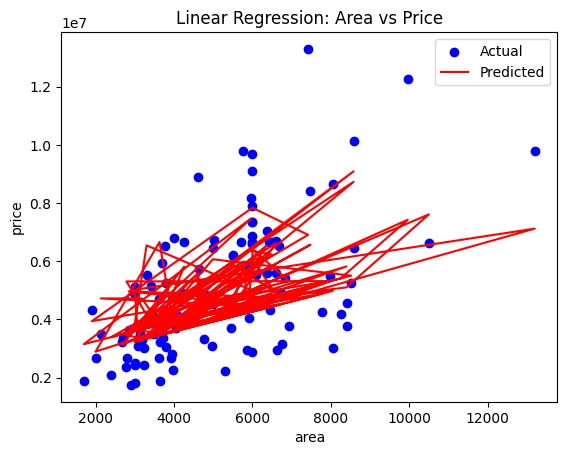

In [24]:

plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.plot(X_test['area'], lr.predict(X_test), color='red', label='Predicted')
plt.xlabel('area')
plt.ylabel('price')
plt.title('Linear Regression: Area vs Price')
plt.legend()
plt.show()

8.Interpret Coefficients

In [13]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

            Coefficient
area       3.454666e+02
bedrooms   3.601977e+05
bathrooms  1.422320e+06


9.Correlation Heatmap (for numerical variables)
Helps detect multicollinearity and understand which features correlate with price.

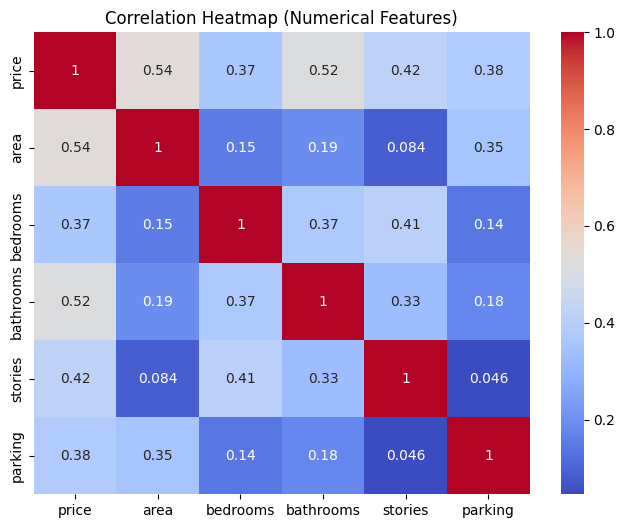

In [14]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


10.Actual vs Predicted Prices
Shows how well the model fits.

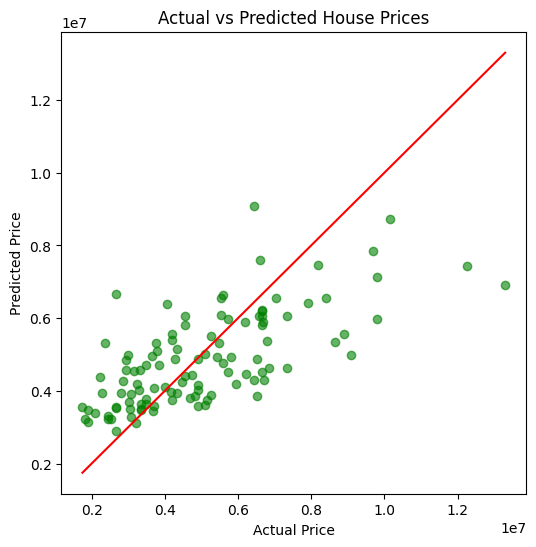

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  
plt.show()

11.Residual Plot
Used to check regression assumptions like equal variance.

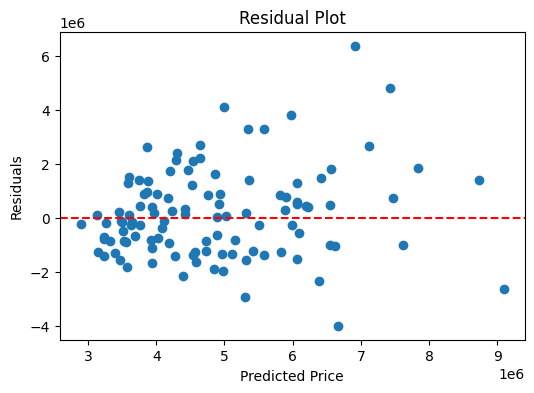

In [17]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

12.Price Distribution
To check target skewness or outliers.

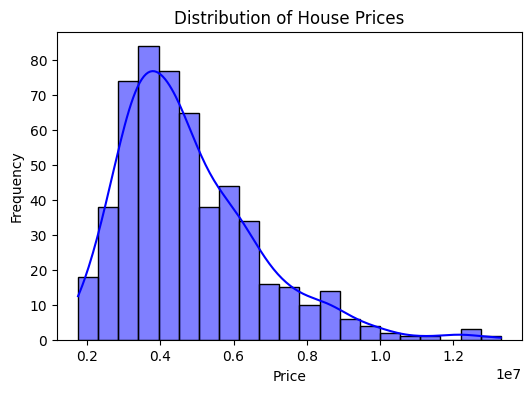

In [18]:
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True, color='blue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

13.Boxplots for Categorical Features vs Price
Helps see if categorical features affect house price.
 a. Furnishing Status

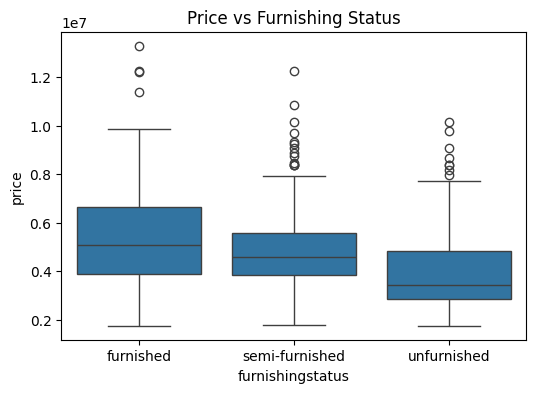

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title("Price vs Furnishing Status")
plt.show()

b. Air Conditioning

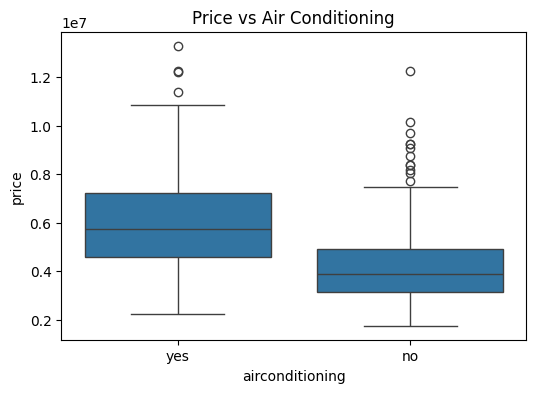

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='airconditioning', y='price', data=df)
plt.title("Price vs Air Conditioning")
plt.show()

c. Preferred Area

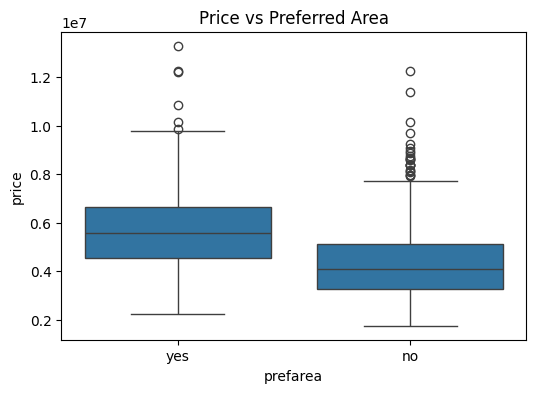

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='prefarea', y='price', data=df)
plt.title("Price vs Preferred Area")
plt.show()

PairPlot
A pairplot is a grid of scatter plots that shows the relationships between numerical features.
It helps visualize linear patterns, detect correlations, and spot potential outliers before building a regression model.

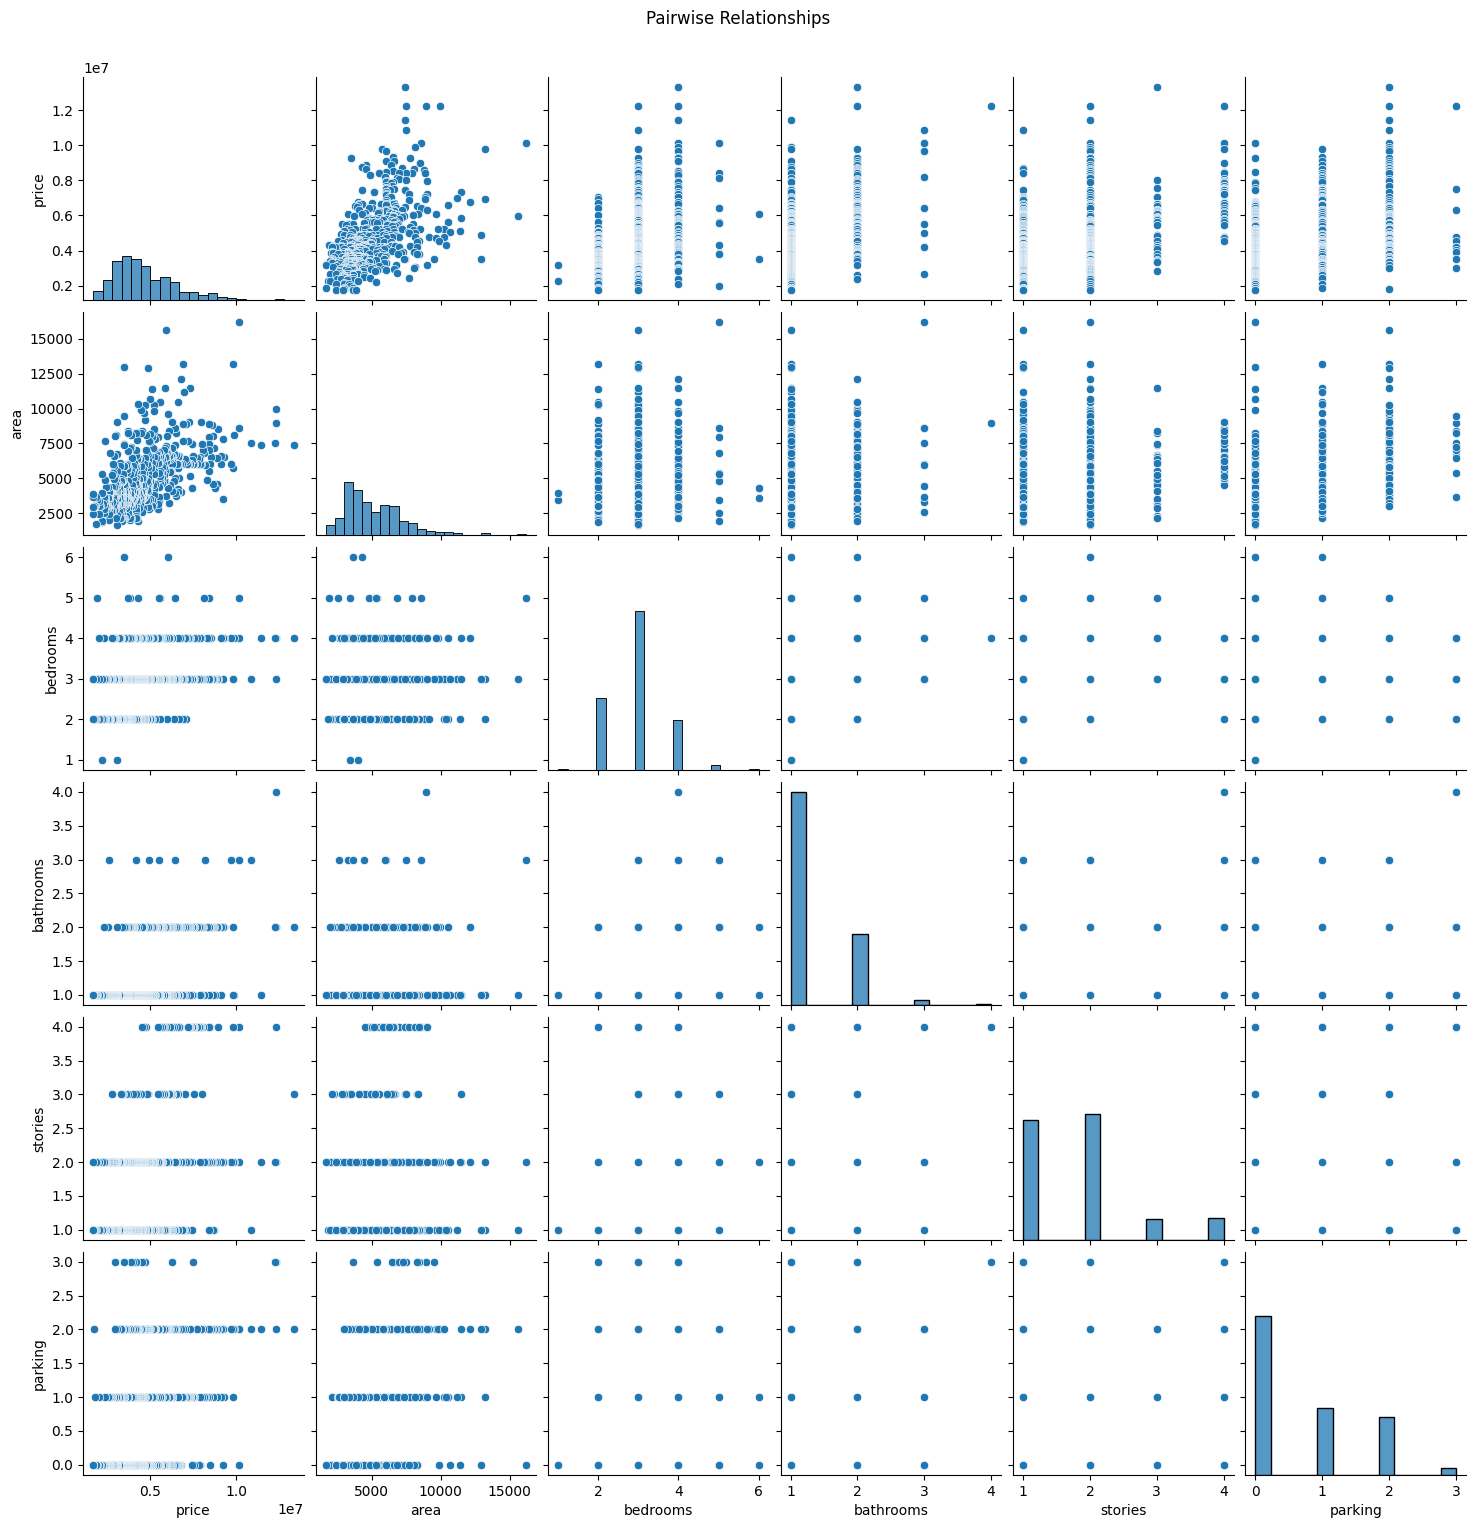

In [22]:
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()